<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/NN1_BackPropogation_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
class NeuralNetwork():

  def __init__(self, i_nodes, h1_nodes, o_nodes, lr):

    self.W2 = np.random.randn(i_nodes, h1_nodes) / np.sqrt(i_nodes/2)
    self.b2 = np.random.rand(h1_nodes)

    self.W3 = np.random.randn(h1_nodes, o_nodes) / np.sqrt(h1_nodes/2)
    self.b3 = np.random.rand(o_nodes)

    '''self.z1 = np.zeros([1,i_nodes])
    self.a1 = np.zeros([1,i_nodes])

    self.z2 = np.zeros([1,h1_nodes])
    self.a2 = np.zeros([1,h1_nodes])

    self.z3 = np.zeros([1,o_nodes])
    self.a3 = np.zeros([1,o_nodes])'''

    self.lr = lr

  def feed_forward(self):

    delta = 1e-7

    self.z1 = self.input_data
    self.a1 = self.input_data

    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) + self.b3
    self.a3 = sigmoid(self.z3)

    return -np.sum(self.target_data * np.log(self.a3 + delta) + (1 - self.target_data) + np.log((1 - self.a3) + delta))

  def loss_val(self):

    delta = 1e-7

    self.z1 = self.input_data
    self.a1 = self.input_data
    
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) +self.b3
    self.a3 = sigmoid(self.z3)

    return -np.sum(self.target_data * np.log(self.a3 + delta) + (1 - self.target_data) * np.log((1 - self.a3) + delta))

  def accuracy(self, test_input_data, test_target_data):

    matched_list = []
    unmatched_list = []

    for i in range(len(test_input_data)):

      label = int(test_target_data[i])
      data = (test_input_data[i] / 255.0 * 0.99) + 0.01

      #predict을 위해서 vector를 matrix로 변환=> (1,test_input_data[1])
      predicted_num = self.predict(np.array(data, ndmin=2))

      if label == predicted_num:
        matched_list.append(i)

      else:
        unmatched_list.append(i)

    accuracy_val = len(matched_list) / len(test_input_data)

    return accuracy_val, unmatched_list

  def train(self, input_data, target_data):

    self.input_data = input_data
    self.target_data = target_data

    loss_val = self.feed_forward()

    loss_3 = (self.a3 - self.target_data) * self.a3 * (1 - self.a3)

    self.W3 = self.W3 - self.lr * np.dot(self.a2.T, loss_3)
    self.b3 = self.b3 - self.lr * loss_3

    loss_2 = np.dot(loss_3, self.W3.T) * self.a2 * (1 - self.a2)

    self.W2 = self.W2 - self.lr * np.dot(self.a1.T, loss_2)
    self.b2 = self.b2 - self.lr * loss_2

  def predict(self, input_data):

    z2 = np.dot(input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    a3 = sigmoid(z3)

    predicted_num= np.argmax(a3)

    return predicted_num

In [ ]:
training_data = np.loadtxt("./drive/MyDrive/AI_INOVATION_SQUARE/data/./mnist_train.csv",delimiter=',',dtype=np.float32)

print("training_data.shape = ",training_data.shape)

training_data.shape =  (60000, 785)


In [ ]:
#hyper_parameter

i_nodes = training_data.shape[1] - 1
h1_nodes = 100
o_nodes = 10
lr = 0.1
epochs = 1

loss_val_list = []

nn = NeuralNetwork(i_nodes, h1_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):

  for step in range(len(training_data)):

    target_data = np.zeros(o_nodes) + 0.01
    target_data[int(training_data[step,0])] = 0.99

    input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01

    nn.train(np.array(input_data, ndmin=2), np.array(target_data, ndmin=2))

    if step % 1000 == 0:
      print("epochs = ",i, ", step = ", step, ", current loss value = ", nn.loss_val())

    loss_val_list.append(nn.loss_val())

end_time = datetime.now()

print("")
print("Elapsed time = ", end_time - start_time)

epochs =  0 , step =  0 , current loss value =  4.121601758348593
epochs =  0 , step =  1000 , current loss value =  1.624282935909731
epochs =  0 , step =  2000 , current loss value =  1.9151034057199066
epochs =  0 , step =  3000 , current loss value =  2.544181385651647
epochs =  0 , step =  4000 , current loss value =  1.0691479643097106
epochs =  0 , step =  5000 , current loss value =  0.8797633097084512
epochs =  0 , step =  6000 , current loss value =  0.6371646866346615
epochs =  0 , step =  7000 , current loss value =  1.5247215656077944
epochs =  0 , step =  8000 , current loss value =  0.6565818985960455
epochs =  0 , step =  9000 , current loss value =  0.8833738967618299
epochs =  0 , step =  10000 , current loss value =  0.6551129537066614
epochs =  0 , step =  11000 , current loss value =  0.6812775774166532
epochs =  0 , step =  12000 , current loss value =  0.8223515151091911
epochs =  0 , step =  13000 , current loss value =  0.8972711183009194
epochs =  0 , step =  

In [ ]:
test_data = np.loadtxt("./drive/MyDrive/AI_INOVATION_SQUARE/data/mnist_test.csv", delimiter=',', dtype=np.float32)

test_input_data = test_data[ : , 1: ]
test_target_data = test_data[ :, 0]

print("test_data.shape = ",test_data.shape)

test_data.shape =  (10000, 785)


In [ ]:

(accuracy_ret, false_list) = nn.accuracy(test_input_data, test_target_data)

print("Accurcay = ", np.round(accuracy_ret * 100,3) ,'%')

Accurcay =  93.46 %


###오답확인

In [ ]:
print (false_list)

[8, 33, 111, 119, 124, 139, 144, 149, 241, 247, 259, 290, 300, 313, 318, 320, 321, 325, 340, 352, 358, 362, 381, 403, 444, 445, 448, 449, 468, 479, 495, 511, 532, 543, 550, 551, 565, 571, 578, 582, 591, 605, 610, 613, 624, 628, 629, 658, 659, 684, 689, 691, 707, 717, 720, 740, 741, 760, 791, 810, 839, 844, 846, 881, 900, 924, 938, 939, 947, 950, 951, 956, 959, 960, 965, 975, 990, 1003, 1012, 1014, 1032, 1039, 1050, 1062, 1068, 1073, 1082, 1096, 1107, 1112, 1114, 1119, 1173, 1181, 1191, 1192, 1194, 1198, 1200, 1204, 1206, 1224, 1226, 1228, 1232, 1234, 1242, 1247, 1248, 1252, 1256, 1260, 1264, 1270, 1283, 1289, 1299, 1319, 1326, 1328, 1337, 1357, 1391, 1393, 1409, 1410, 1413, 1422, 1433, 1440, 1444, 1453, 1466, 1467, 1476, 1494, 1500, 1522, 1525, 1527, 1530, 1549, 1553, 1559, 1581, 1609, 1621, 1634, 1641, 1678, 1681, 1696, 1709, 1716, 1717, 1718, 1721, 1722, 1751, 1754, 1759, 1772, 1790, 1813, 1816, 1823, 1828, 1839, 1850, 1855, 1865, 1878, 1883, 1899, 1901, 1911, 1917, 1930, 1938, 1940,

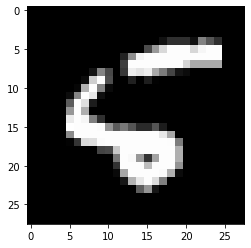

In [ ]:
img = test_data[8, 1:].reshape(28,28)

plt.imshow(img, cmap = 'gray')
plt.show()

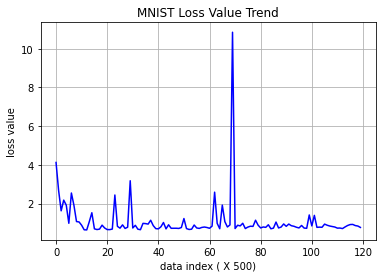

In [ ]:
#손실함수 추세 확인

Y_DATA_LIST = []

for i in range(0, len(loss_val_list), 500):
  Y_DATA_LIST.append(loss_val_list[i])

plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500)')
plt.ylabel('loss value')
plt.grid()
plt.plot(Y_DATA_LIST, color='b')
plt.show()

###최대손실값/최소손실값 확인

In [ ]:
max_loss = np.max(loss_val_list)
min_loss = np.min(loss_val_list)

max_loss_index = np.argmax(loss_val_list)
min_loss_index = np.argmin(loss_val_list)

print("max_loss = ", max_loss,", max_loss_index = ", max_loss_index, ",min_loss = ", min_loss, ", min_loss_index = ", min_loss_index)

max_loss =  16.253603817825233 , max_loss_index =  59915 ,min_loss =  0.5933760267429926 , min_loss_index =  6528


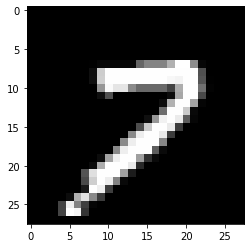

label =  4.0


In [ ]:
img = training_data[max_loss_index,1: ].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

print("label = ",  training_data[max_loss_index, 0])


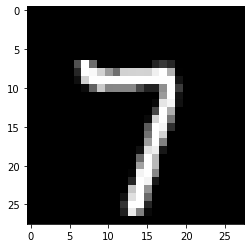

label =  7.0


In [ ]:
img = training_data[min_loss_index, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

print("label = ", training_data[min_loss_index,0])